 dataset and investigation.

# Project: Investigate a Dataset - Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database.It includes 1 table "tmdb-movies" with 21 columns including "id" , "cast" , "runtime" , "revenue_adj" , and many more which will be used to analyze and answer questions about movie trends.    


### Question for Analysis

properties associated with movies during 60 year period:

What is the relation of the revenue and the budget over this period ?
Which genres are more popular? 





In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [89]:
# Loading and inspecting data to start the Data Wrangling process
df = pd.read_csv('tmdb-movies.csv') # reading the dataset
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Some info about data

In [90]:
df.shape #total rows and columns respectively

(10866, 21)

In [91]:
df.describe() #more important info about our data 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


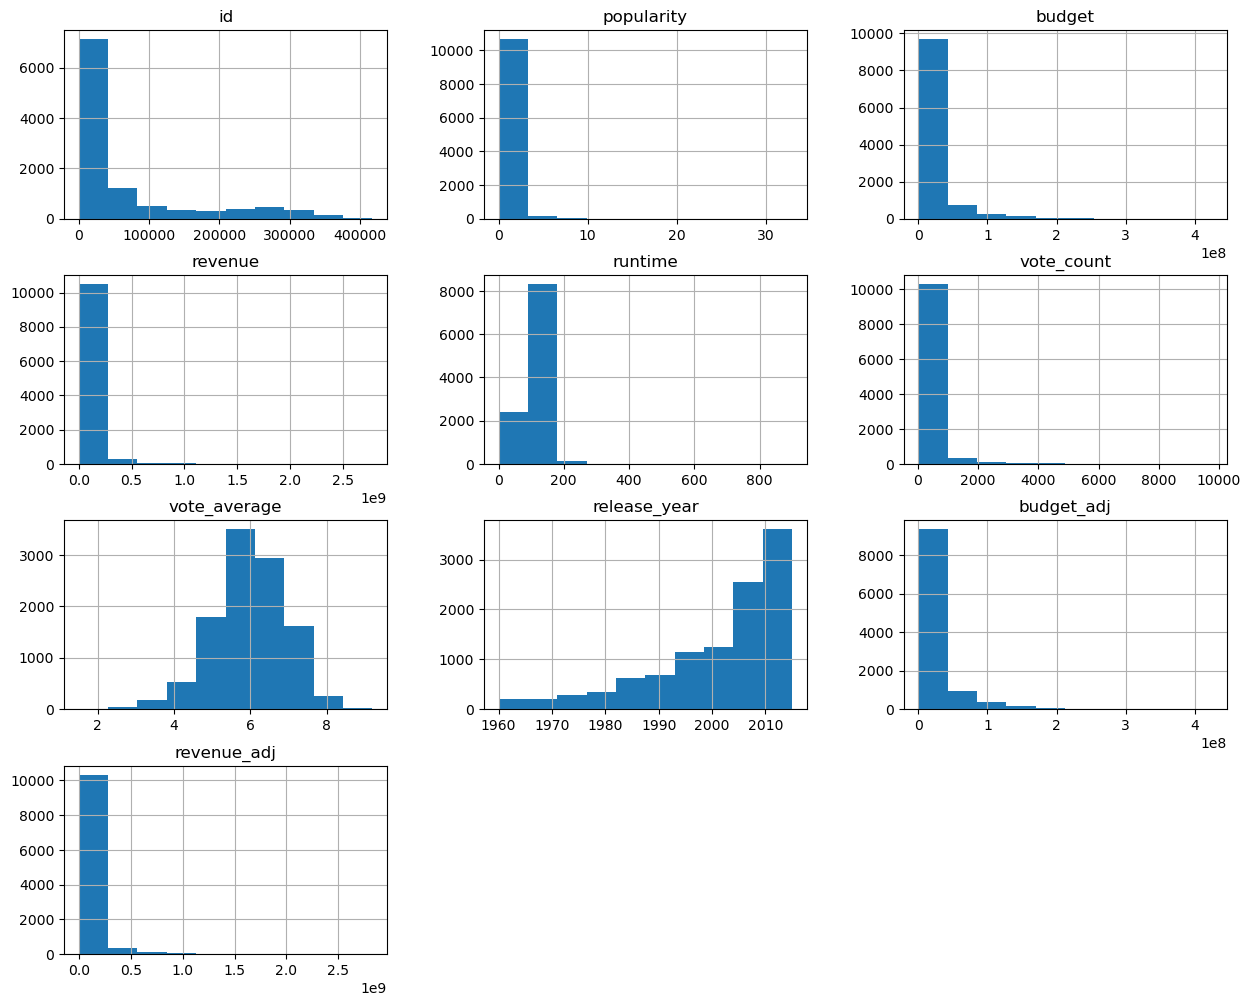

In [92]:
df.hist(figsize=(15,12)); #plotting each column in the dataset python


### Data Cleaning


In [93]:
# dropping unwanted columns
df.drop(['id' , 'imdb_id' , 'homepage' ,'cast', 'tagline' , 'overview' , 'keywords' , 'release_date' , 'budget' , 'revenue'] , axis = 1 , inplace = True)


In [94]:
#removing _adj from both budget and revenue as both of them will be used beacuse they are accounting for inflation  
df.rename(columns={'budget_adj': 'budget', 'revenue_adj': 'revenue'} , inplace = True)

In [95]:
df.head() # looking at the data after cleaning

,popularity,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [96]:
#looking for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   director              10822 non-null  object 
 3   runtime               10866 non-null  int64  
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget                10866 non-null  float64
 10  revenue               10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [97]:
#dropping all null rows as they are not a lot and will not have a big effect
df.dropna(inplace =  True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   original_title        9807 non-null   object 
 2   director              9807 non-null   object 
 3   runtime               9807 non-null   int64  
 4   genres                9807 non-null   object 
 5   production_companies  9807 non-null   object 
 6   vote_count            9807 non-null   int64  
 7   vote_average          9807 non-null   float64
 8   release_year          9807 non-null   int64  
 9   budget                9807 non-null   float64
 10  revenue               9807 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 919.4+ KB


In [98]:
#replace zero values with null in both budget and revenue for more accuracy

df["budget"].replace(to_replace = 0, value = np.nan, inplace=True) #replace for budget
df["revenue"].replace(to_replace = 0, value = np.nan, inplace=True) #replace for revenue



df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,5.030000e+03,4.753000e+03
mean,0.693133,102.743245,238.609463,5.966361,2000.891200,3.773020e+07,1.172994e+08
std,1.035473,28.133335,602.052173,0.914297,13.032032,4.219539e+07,2.002363e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.231584,90.000000,18.000000,5.400000,1994.000000,8.838658e+06,1.163278e+07
50%,0.418900,100.000000,46.000000,6.000000,2005.000000,2.370705e+07,4.570776e+07
75%,0.774204,112.000000,172.000000,6.600000,2011.000000,5.078480e+07,1.348006e+08
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [99]:
# change to financial data to millions
df["budget"] = df["budget"].div(10**6)
df["revenue"] = df["revenue"].div(10**6)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question (properties associated with movies during 60 year period )

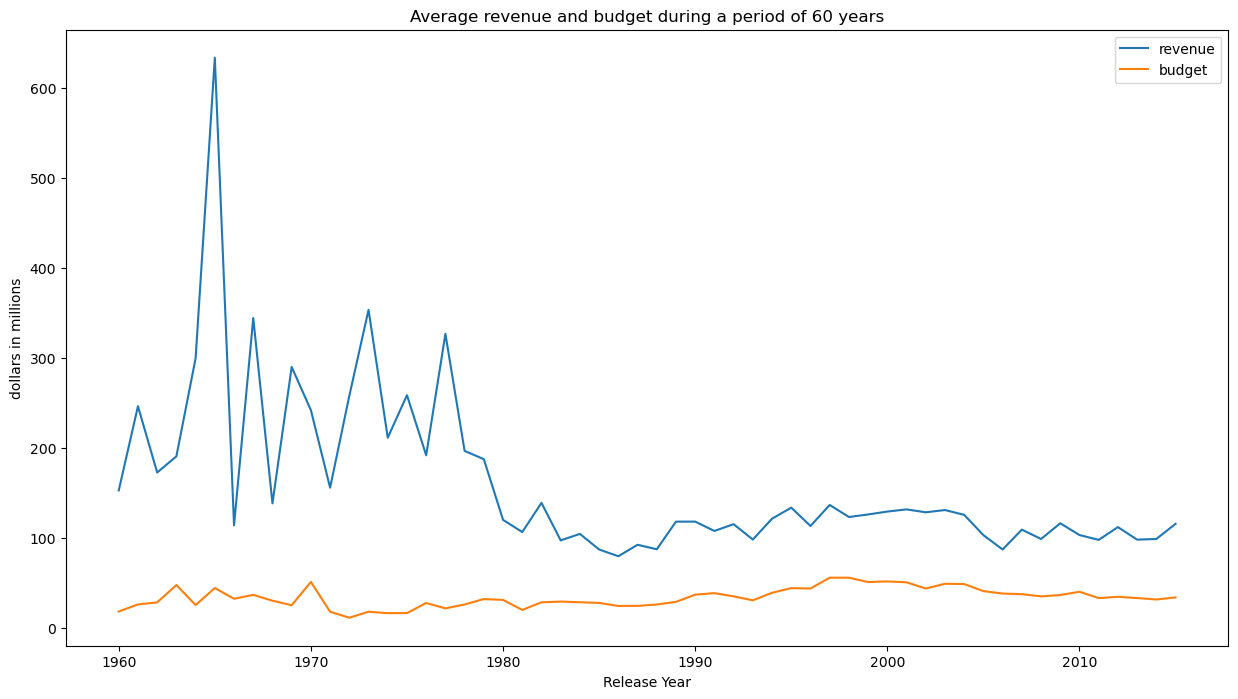

In [107]:
#function for plotting 
def MyGrpPlot (df, grpVar, yVar, stat = 'mean'):
    df.groupby([grpVar])[yVar].agg(stat).plot(figsize = [15 , 8] ,title = 'Average revenue and budget during a period of 60 years', xlabel = 'Release Year', ylabel = 'dollars in millions')

# plot 1: in this plot both the average revenue (as blue) and budget (as orange) are shown during a period of 60 years to find trends
# for this plot we are trying to find how profitable is the movie industry during the 60 year period
MyGrpPlot(df, 'release_year' , ['revenue' , 'budget']);



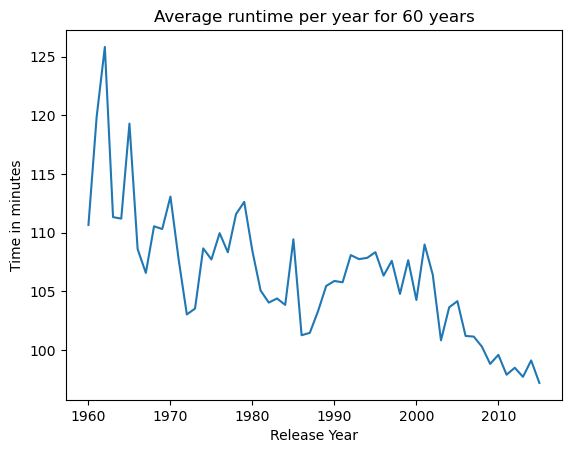

In [111]:
#plot 2: the average runtime per year for 60 years to find a connection with plot 1
#in this plot we can try to connect the revenue with the runtime per year
df.groupby('release_year').runtime.mean().plot(x='release_year', y='runtime' , title = 'Average runtime per year for 60 years', xlabel = 'Release Year', ylabel = 'Time in minutes');


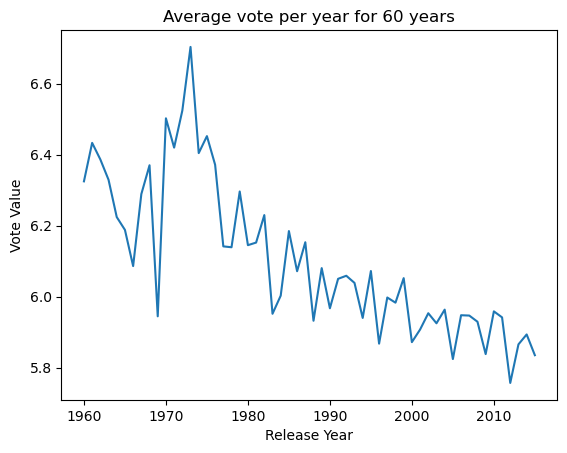

In [113]:
#plot 3: the average vote per year for 60 years to find a connection with plot 1
#in this plot we can try to connect the vote_average with the average vote per year
df.groupby('release_year').vote_average.mean().plot(x='release_year', y='vote_average' ,title = 'Average vote per year for 60 years', xlabel = 'Release Year', ylabel = 'Vote Value');

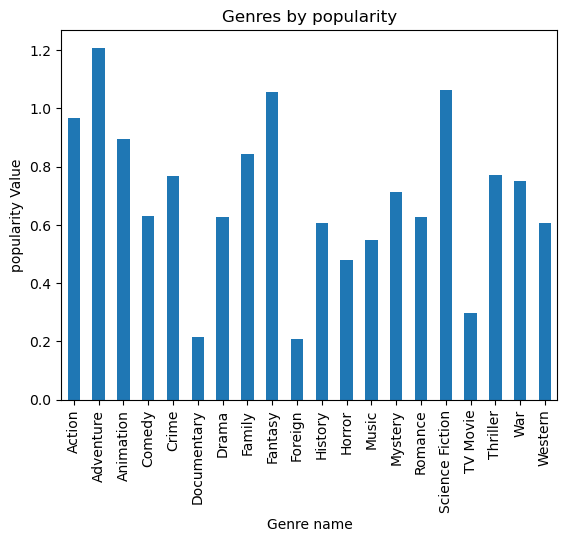

In [116]:
# creating a datafram for genres using split
genres_df = df.assign(genres = df['genres'].str.split('|')).explode('genres')

#plot 4: a bar chart showing which genres are more popular
#for this plot we are evaluating each genre with the average popularity for each one
genres_df.groupby('genres').popularity.mean().plot.bar(title = 'Genres by popularity', xlabel = 'Genre name', ylabel = 'popularity Value');

<a id='conclusions'></a>
## Conclusions

After cleaning the data and dropping the unwanted columns we start to analysis properties during a 60 year period of  released movies. both budget and revenue in the data set are accounted for inflation for more accuracy. Ass shown in plot 1 in all years the mean revenue is always much higher than the budget which shows that the movie industry is profitable. However, it is shown that the gap between the revenue and budget is getting closer as the years progresses which shows that movies are becoming less profitable with time. This can be connected with plot 2 and plot 3 as they show that movies are getting shorter in runtime and user’s vote is getting lower with the passing of years.When it comes to genres as shown in plot 4, we can see that adventure is the most popular and both fantasy and science fiction coming next.However, both documentary and foreign come at the end.            

## Limitation
The main limitation in this data set was the zero values in both revenue and budget which will lead to less accuracy however they were replaced with null values to be ignored in the analyses